# Plotting mood

## Reading dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('dataset_mood_smartphone.csv')

In [5]:
print(df.head())


   Unnamed: 0       id                     time variable  value
0           1  AS14.01  2014-02-26 13:00:00.000     mood    6.0
1           2  AS14.01  2014-02-26 15:00:00.000     mood    6.0
2           3  AS14.01  2014-02-26 18:00:00.000     mood    6.0
3           4  AS14.01  2014-02-26 21:00:00.000     mood    7.0
4           5  AS14.01  2014-02-27 09:00:00.000     mood    6.0


## Plotting mood time-series

/var/folders/d8/_xc_qyn9121fv2fflg18bqxc0000gn/T/ipykernel_36730/2527595507.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['time'] = pd.to_datetime(filtered_df['time'])


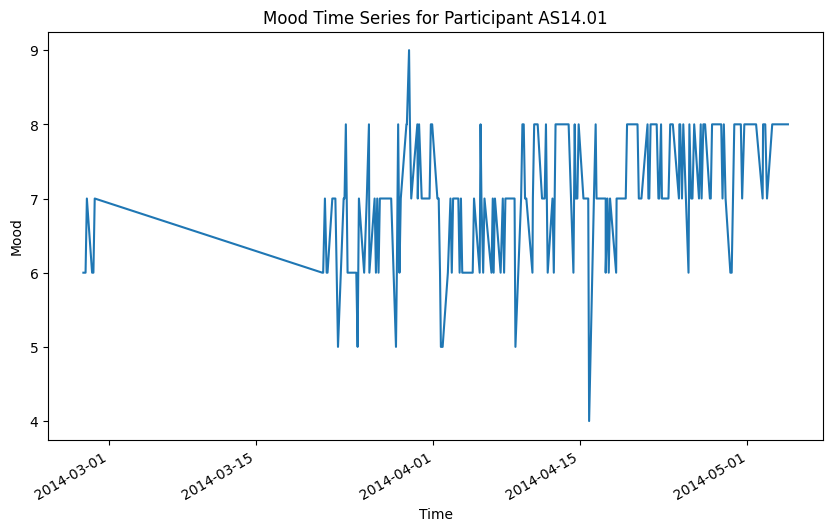

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

participant_id = 'AS14.01'

filtered_df = df[(df['id'] == participant_id) & (df['variable'] == 'mood')]

# Convert 'time' column to datetime and set as index
filtered_df['time'] = pd.to_datetime(filtered_df['time'])
filtered_df = filtered_df.set_index('time')

# Plot the 'value' column
filtered_df['value'].plot(figsize=(10, 6), title=f'Mood Time Series for Participant {participant_id}')

plt.xlabel('Time')
plt.ylabel('Mood')
plt.show()

### Plotting all mood time-series

In [4]:
unique_ids = df['id'].unique()
# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

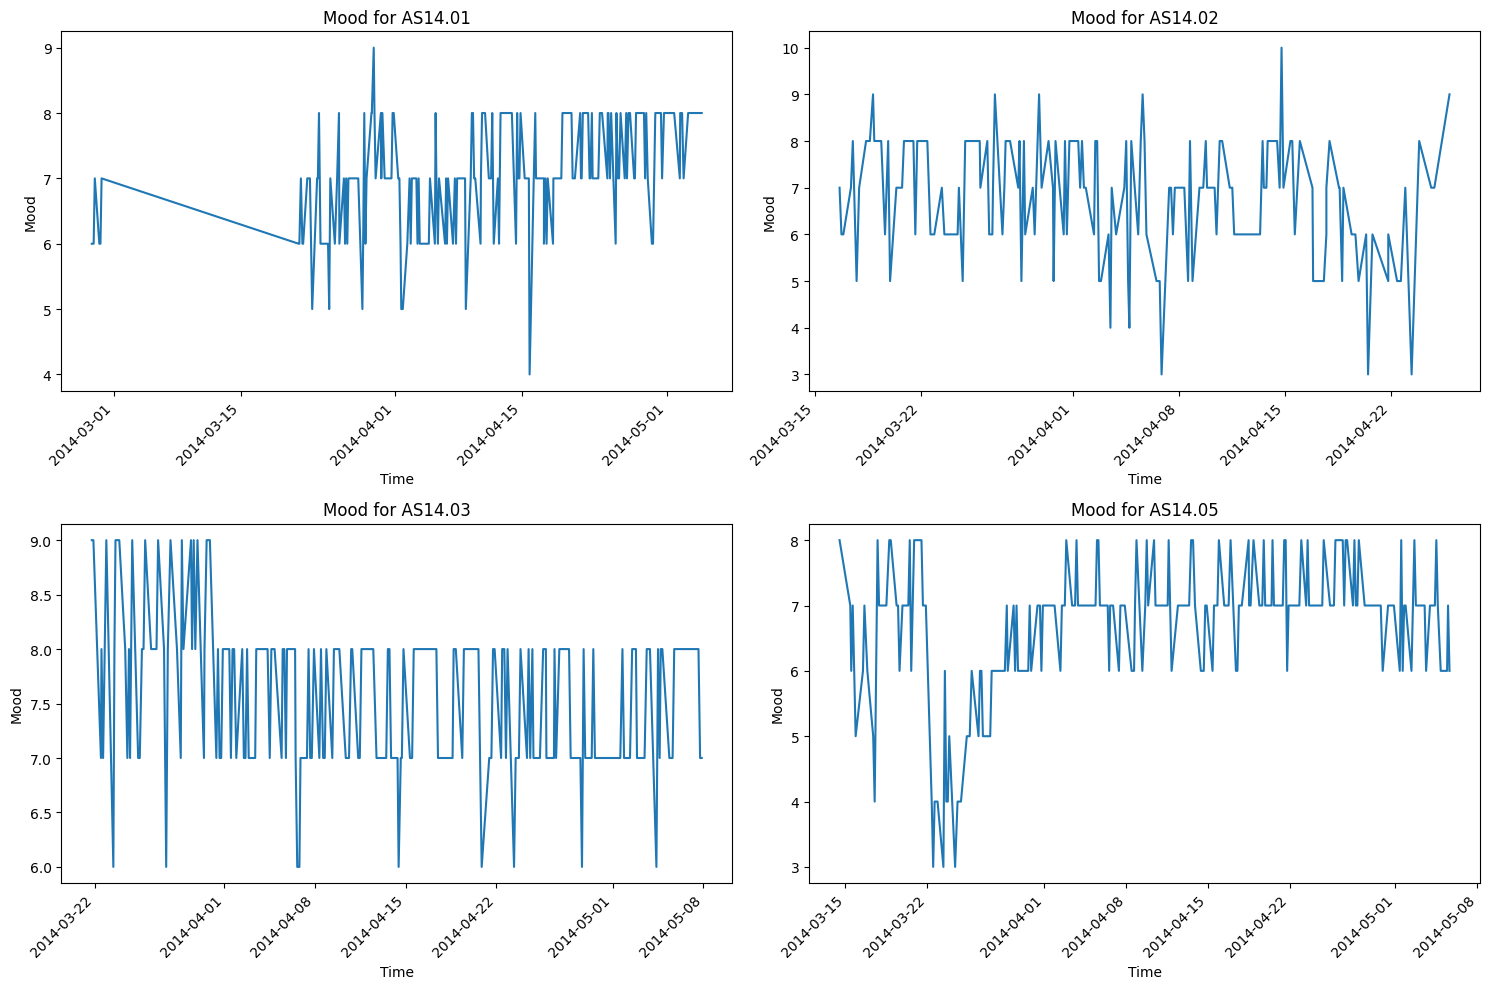

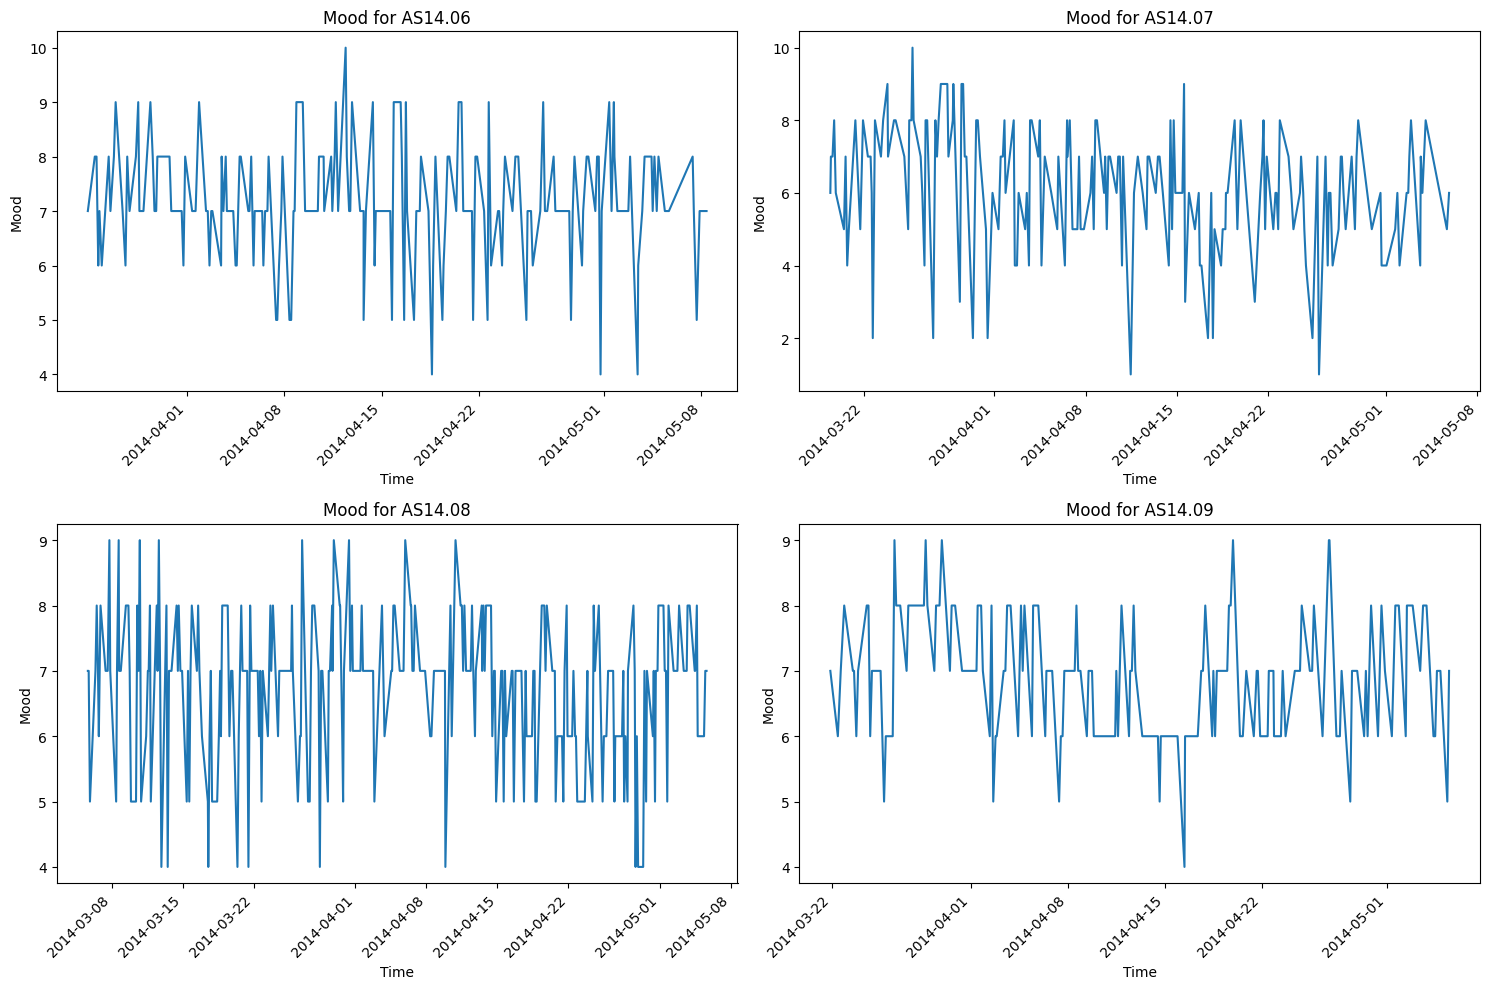

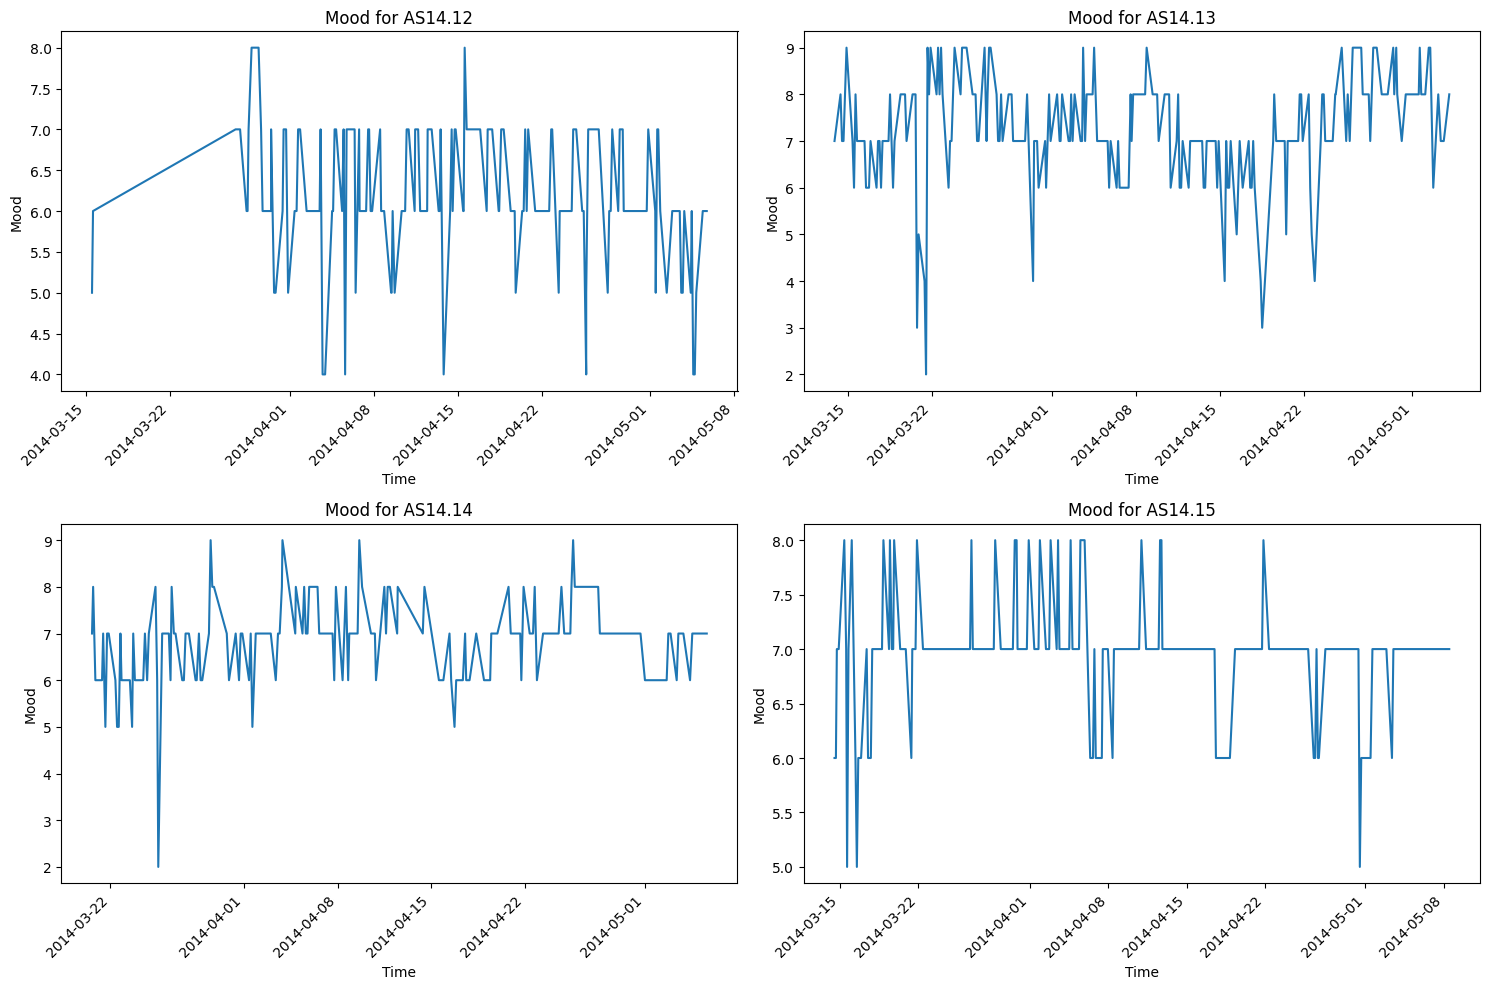

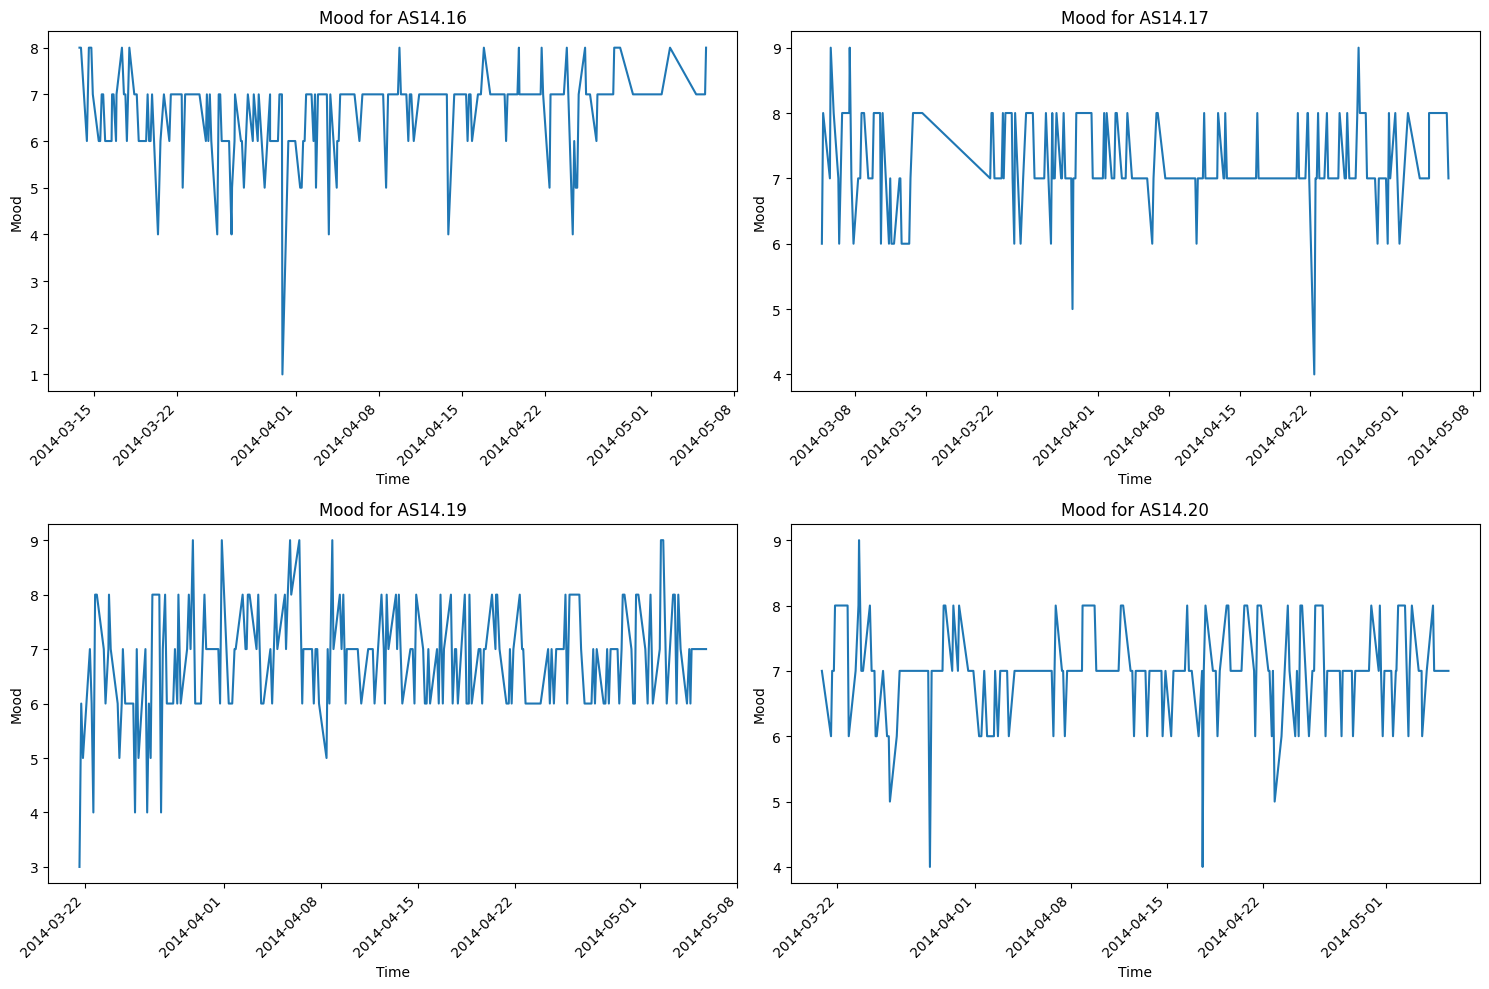

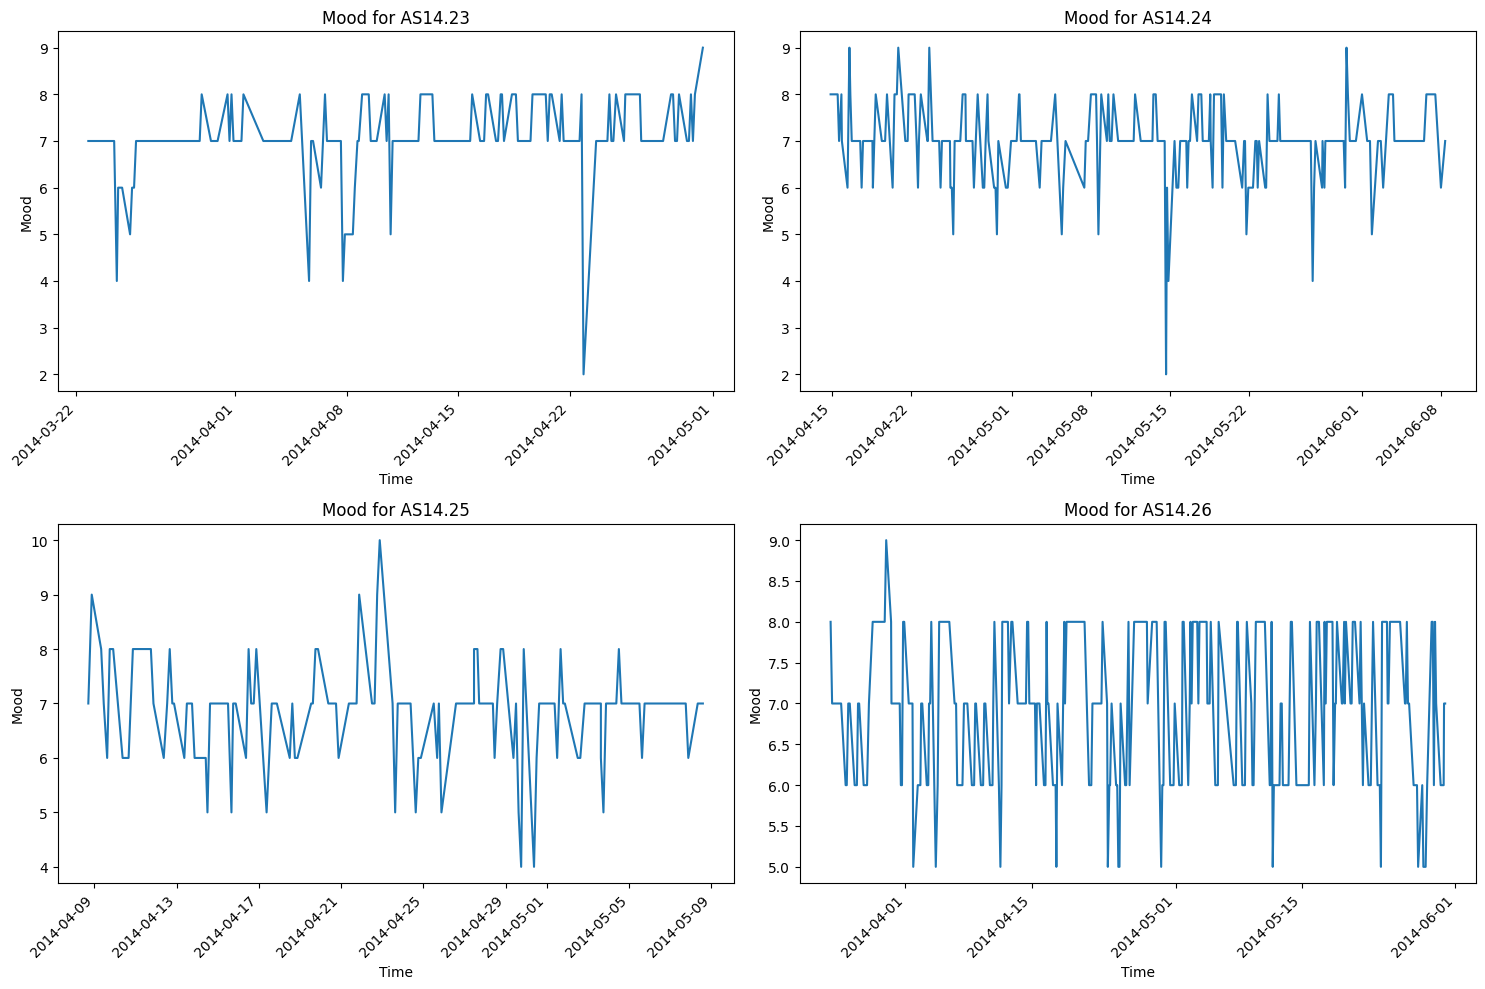

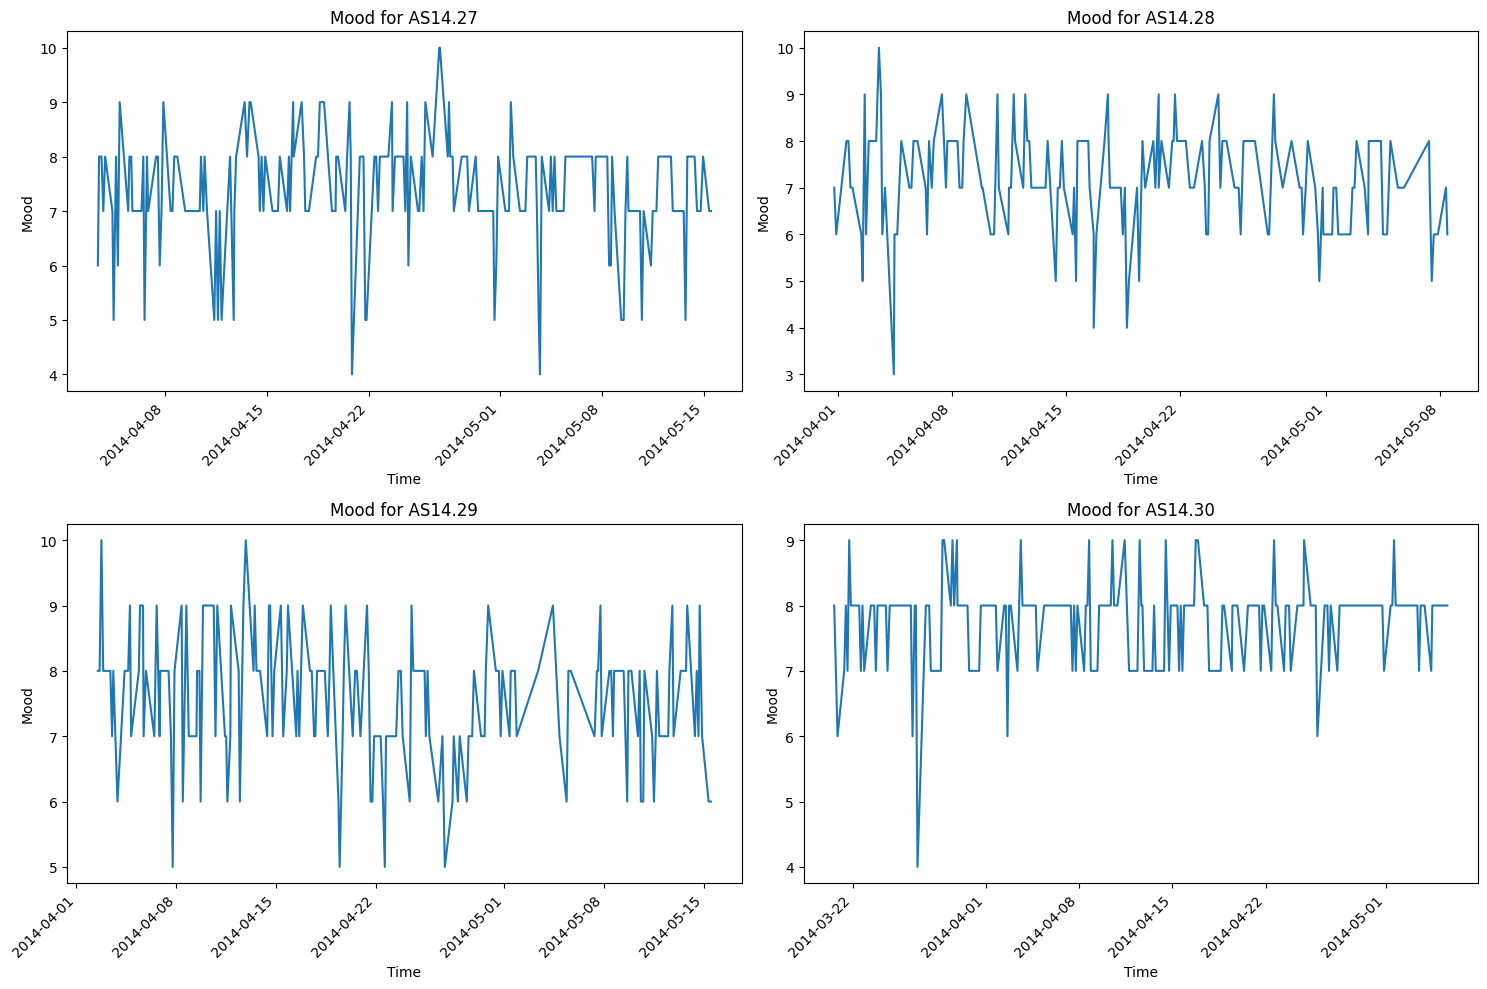

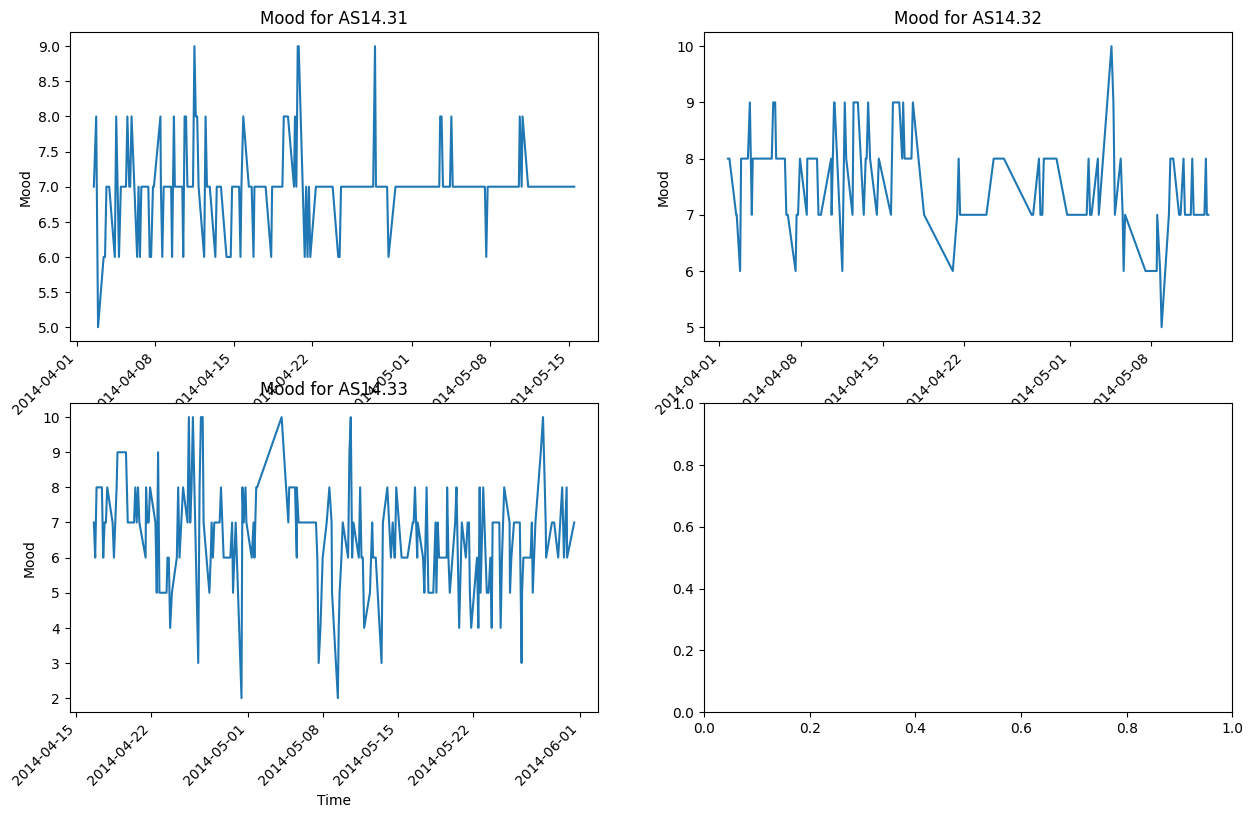

In [5]:


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


def plot_mood_time_series_subplot(df, participant_id, ax):
    """
    Plots the mood time series for a specified participant on a given matplotlib axis.
    This allows for integration into a figure with multiple subplots.

    Parameters:
    - df: pandas DataFrame containing the dataset.
    - participant_id: String representing the participant's ID.
    - ax: A matplotlib axis object where the plot will be drawn.
    """
    # Filter for a specific participant and the 'mood' variable
    filtered_df = df[(df['id'] == participant_id) & (df['variable'] == 'mood')]

    
    filtered_df = filtered_df.set_index('time')

    # Plot the 'value' column on the provided axis
    filtered_df['value'].plot(ax=ax, title=f'Mood for {participant_id}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Mood')

    # Date formatting to prevent overlap
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Auto-adjust the date interval
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Compact date format
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')  # Rotate labels for better fit

# Example usage:
# df = pd.read_csv('data.csv')  # Load your dataset


for i in range(0,len(unique_ids), 4):

    # Create a figure with multiple subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Adjust subplot layout as needed

        # Plot the mood time series for four participants on different subplots
    plot_mood_time_series_subplot(df, unique_ids[i], axs[0, 0])

    if i+1 >= len(unique_ids):
        break
    plot_mood_time_series_subplot(df, unique_ids[i+1], axs[0, 1])
    if i+2 >= len(unique_ids):
        break
    plot_mood_time_series_subplot(df, unique_ids[i+2], axs[1, 0])
    if i+3 >= len(unique_ids):
        break
    plot_mood_time_series_subplot(df, unique_ids[i+3], axs[1, 1])

    
    plt.tight_layout()  # Adjust the layout so that plots do not overlap
    fig.savefig(f"mood_partecipants_{i}.png")






## Plotting times of all mood recordings

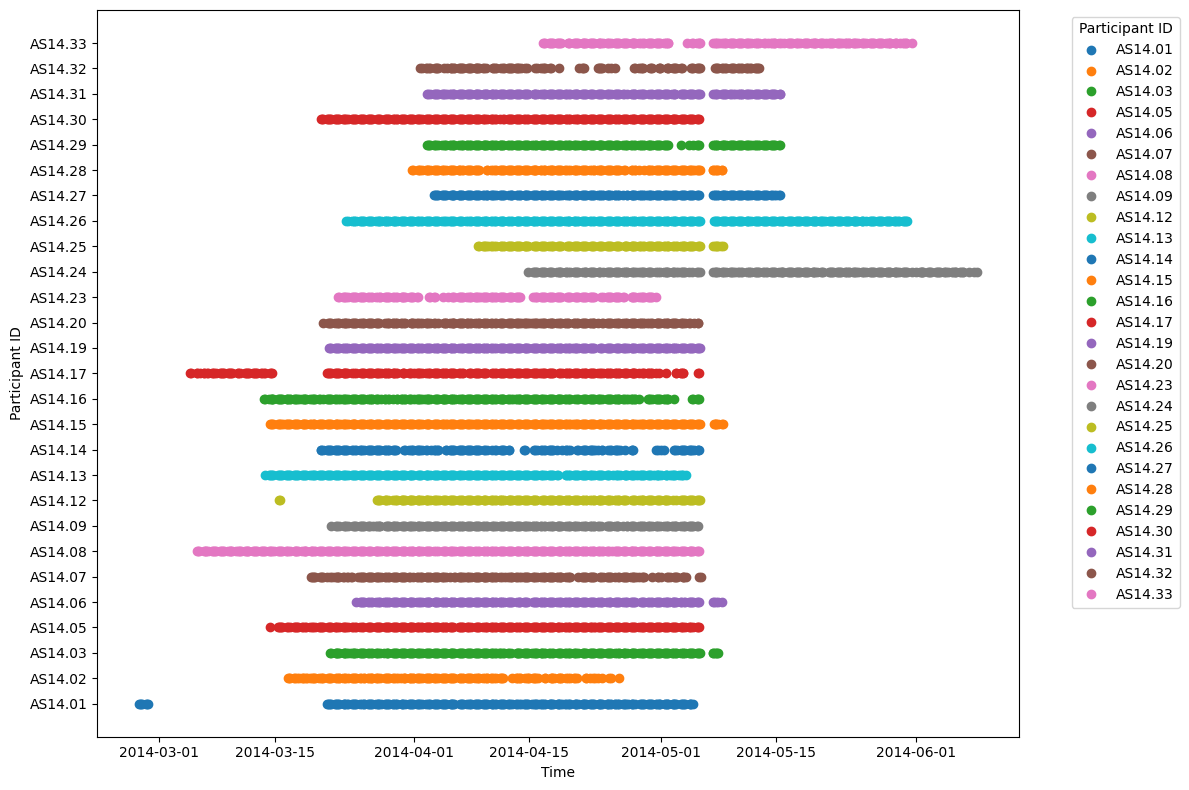

In [6]:
import numpy as np
def plot_mood_recordings(df):
    """
    Plots all mood recordings for each subject on the same graph. Each subject's recordings
    are represented as dots on the same y line, with the time of the recording as the x-axis.

    Parameters:
    - df: pandas DataFrame containing the dataset.
    """
    # Filter the DataFrame for 'mood' variable
    mood_df = df[df['variable'] == 'mood']

    

    # Assign a unique y-value (line) for each participant
    unique_ids = mood_df['id'].unique()
    id_to_y = {id_: i + 1 for i, id_ in enumerate(unique_ids)}  # Mapping IDs to a y-value

    # Plot settings
    fig, ax = plt.subplots(figsize=(12, 8))
    for participant_id, y_val in id_to_y.items():
        # Filter data for the participant
        participant_data = mood_df[mood_df['id'] == participant_id]
        # Plot each mood recording as a dot
        ax.plot(participant_data['time'], np.repeat(y_val, len(participant_data)), 'o', label=participant_id)

    # Improve the plot aesthetics
    ax.set_yticks(range(1, len(unique_ids) + 1))
    ax.set_yticklabels(unique_ids)
    ax.set_xlabel('Time')
    ax.set_ylabel('Participant ID')
    ax.legend(title='Participant ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    fig.savefig("mood_recordings.png")

# Example usage:
plot_mood_recordings(df)